In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data loading and assembly

In [2]:
spectra = pd.read_csv('../data/dataset.csv')
columns = ['target', 'sampleID']
columns.extend([str(x) for x in range(950, 1530+1,2)])
spectra = spectra[columns]
print(spectra.shape)
spectra.head()

(698, 293)


,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
0,94.333333,0,36.723839,35.745964,34.811623,33.955212,33.197552,32.570518,32.147972,31.807793,...,0.791820,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571
1,94.333333,0,36.369366,35.383987,34.443897,33.584080,32.823158,32.192280,31.770844,31.431589,...,0.685869,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826
2,94.333333,0,35.385422,34.405182,33.466976,32.614578,31.862633,31.242191,30.828016,30.496775,...,0.618997,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850
3,94.333333,0,35.121685,34.145687,33.217796,32.374218,31.630789,31.019081,30.611959,30.286642,...,0.751016,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516
4,76.333333,1,36.185947,35.209904,34.280155,33.430157,32.679989,32.062084,31.647160,31.312046,...,1.001077,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842


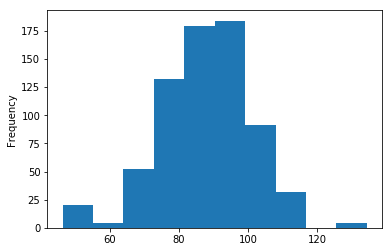

In [3]:
spectra['target'].plot.hist()

In [4]:
#spectra = spectra[spectra['target'] < 100]
spectra.shape

(698, 293)

# Possible outlier cleaning

In [50]:
spectra = spectra[spectra['target'] >  70]
spectra = spectra[spectra['target'] < 105]
spectra.shape

(591, 295)

# Dataset clean ?

In [51]:
spectra.describe()

,target,sampleID,950,952,954,956,958,960,962,964,...,1516,1518,1520,1522,1524,1526,1528,1530,targetBC,targetgroup
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,...,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,87.928652,87.536379,35.044661,34.059021,33.088244,32.219161,31.483288,30.933547,30.500449,30.157210,...,0.757733,0.799690,0.860094,0.923431,0.985304,1.048758,1.113258,1.179162,776.500368,1.505922
std,8.783686,50.051075,1.906569,1.941328,1.972659,1.997614,2.020016,2.040891,2.046624,2.050180,...,0.682902,0.687407,0.694372,0.701637,0.709403,0.717607,0.724738,0.732796,122.641342,1.044541
min,71.000000,0.000000,26.655676,25.505169,24.395685,23.420492,22.587944,21.945278,21.496870,21.147123,...,-1.690527,-1.660725,-1.626905,-1.592568,-1.559861,-1.527287,-1.488511,-1.451741,550.020304,0.000000
25%,81.000000,47.500000,34.131382,33.142456,32.177027,31.320077,30.580695,30.052610,29.616235,29.278268,...,0.352067,0.395005,0.448435,0.509083,0.564684,0.622979,0.682647,0.749581,678.294732,1.000000
50%,87.333333,86.000000,35.391212,34.410076,33.458908,32.597595,31.875414,31.317858,30.891994,30.556061,...,0.773707,0.814727,0.872681,0.943309,1.009027,1.073882,1.142742,1.210870,764.580997,1.000000
75%,94.666667,128.500000,36.296623,35.323826,34.364195,33.510132,32.789316,32.253063,31.824041,31.483051,...,1.214277,1.255950,1.317201,1.383127,1.445784,1.510116,1.582742,1.654029,869.193227,2.000000
max,104.666667,177.000000,39.876778,38.906513,37.984726,37.127365,36.369736,35.748302,35.324451,34.980579,...,2.648642,2.687011,2.757088,2.831928,2.908335,2.985860,3.060459,3.133155,1019.696055,3.000000


In [52]:
spectra.isnull().sum().sum()

0

In [53]:
spectra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 0 to 697
Columns: 295 entries, target to targetgroup
dtypes: float64(293), int64(2)
memory usage: 1.3 MB


# Target description

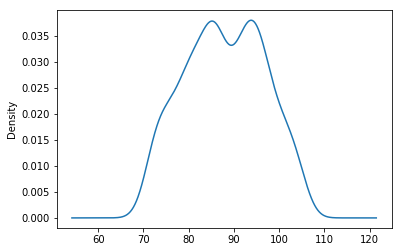

In [54]:
spectra['target'].plot.density()

In [55]:
# The closer to 0, the better
spectra['target'].skew()


-0.031504138888319426

In [56]:
from scipy.special import inv_boxcox
from scipy import stats
spectra['targetBC'], lmbda = stats.boxcox(spectra['target'])

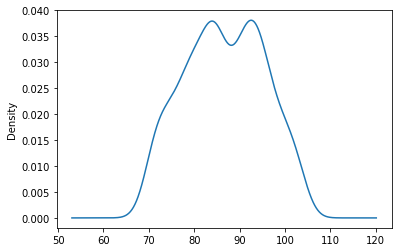

-0.031632930989971296

In [57]:
spectra['targetBC'].plot.density()
plt.show()
spectra['targetBC'].skew()

# SampleID  aggregation

In [58]:
spectra[['target']].describe()

,target
count,591.000000
mean,87.928652
std,8.783686
min,71.000000
25%,81.000000
50%,87.333333
75%,94.666667
max,104.666667


OrderedDict([(0.0, 71.0), (0.25, 81.0), (0.5, 87.33333333333331), (0.75, 94.66666666666669), (1.0, 104.66666666666669)])


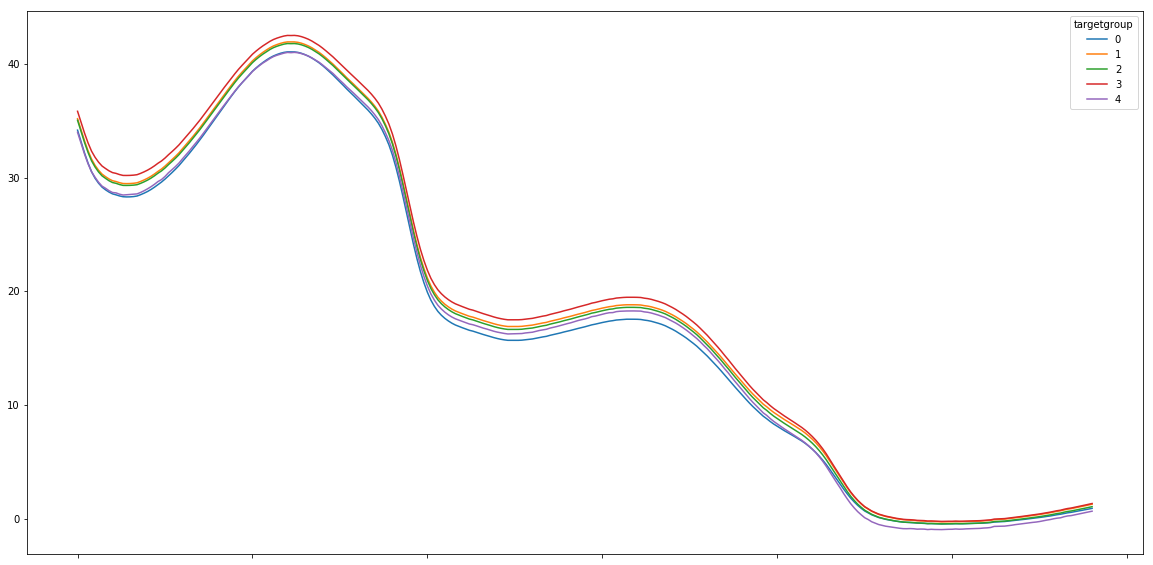

In [59]:
import collections
groupnumber = 5
# defines quant group
quants = spectra['target'].quantile(np.linspace(0, 1, groupnumber)).to_dict()
print(collections.OrderedDict(sorted(quants.items())))
def quantplacement(entry):
    index = -1
    for key,value in collections.OrderedDict(sorted(quants.items())).items():
        if entry < value:
            return index
        index += 1
    return index
        
spectra['targetgroup']=spectra['target'].apply(quantplacement)
spectra.drop(['target', 'targetBC', 'sampleID'], axis=1).groupby('targetgroup').mean().T.plot(figsize=(20,10))
plt.show()


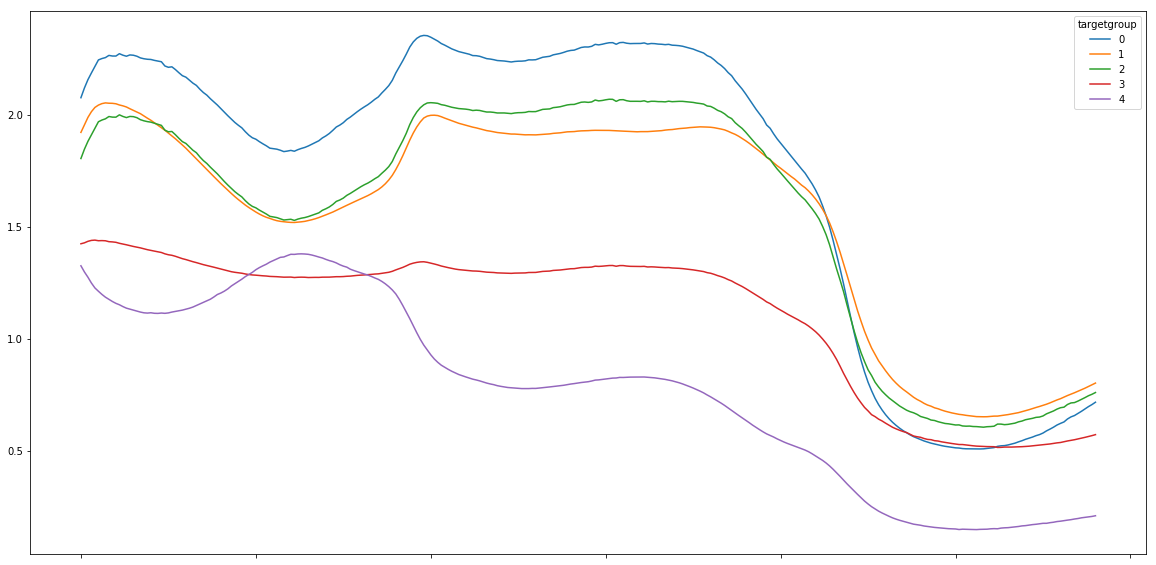

In [60]:
#Standard deviation
spectra.drop(['target', 'targetBC', 'sampleID'], axis=1).groupby('targetgroup').std().T.plot(figsize=(20,10))

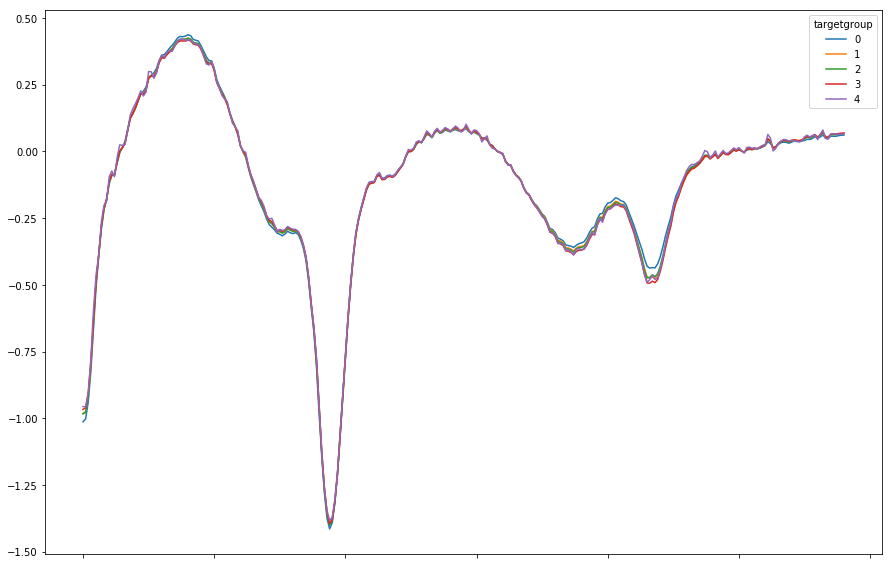

In [61]:
#spectra.groupby('targetgroup').mean()[[str(x) for x in range(950, 1530+1,2)]].T.plot()

def gradient(entry):
    #print(entry)
    return np.gradient(entry)

subset = spectra[[str(x) for x in range(950, 1530+1,2)]].apply(gradient, axis=1)
df = pd.concat((spectra[['targetgroup']], subset), axis=1)

df.groupby('targetgroup').mean().T.plot(figsize=(15,10))

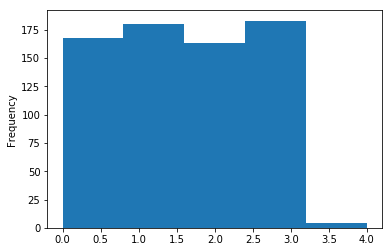

In [16]:
spectra['targetgroup'].plot.hist(bins = groupnumber)

In [17]:
spectra[spectra['targetgroup']==groupnumber-1]

,target,sampleID,950,952,954,956,958,960,962,964,...,1516,1518,1520,1522,1524,1526,1528,1530,targetBC,targetgroup
450,134.333333,114,37.667099,36.727718,35.786377,34.949070,34.252941,33.757992,33.322540,32.973675,...,0.795672,0.842701,0.917717,0.993260,1.073520,1.155239,1.231851,1.305313,1516.320444,4
451,134.333333,114,36.731865,35.789051,34.849888,34.009300,33.306740,32.801090,32.367020,32.021011,...,0.608987,0.654309,0.725987,0.797255,0.873127,0.951849,1.026055,1.095691,1516.320444,4
452,134.333333,114,36.563278,35.613434,34.665424,33.824677,33.125797,32.628231,32.197693,31.853956,...,0.337949,0.376513,0.441873,0.508789,0.579798,0.652901,0.723197,0.790931,1516.320444,4
453,134.333333,114,36.954449,35.983192,35.012585,34.151192,33.431164,32.910233,32.464752,32.109695,...,0.355126,0.393158,0.461092,0.528671,0.600477,0.673185,0.741854,0.807980,1516.320444,4


# Regression

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_union

## Folds definition

In [63]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)

## Savgol filter

https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter

In [64]:
from scipy.signal import savgol_filter

class Savgol(BaseEstimator, TransformerMixin):
    """Apply a lambda feature"""
    def __init__(self, params={}, columns=[str(x) for x in range(950, 1530+1,2)]):
        self.params = params
        self.columns = columns
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X[self.columns]
        return df.apply(lambda x:savgol_filter(x, **self.params), axis=1)
    
savgol = Savgol(params={'window_length':5, 'polyorder':2})
savgol.fit_transform(spectra).shape

(591, 291)

## Column selection

In [65]:
class Colselect(BaseEstimator, TransformerMixin):
    def __init__(self, columns=[]):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.columns]

colselect = Colselect(['sampleID'])
colselect.fit_transform(spectra).shape

(591, 1)

## Blocs creation

In [66]:
savgol = Savgol({'window_length':5, 'polyorder':2})
savgol.fit_transform(spectra).shape

(591, 291)

In [67]:
colselect = Colselect(['sampleID'])
colselect.fit_transform(spectra).shape

(591, 1)

In [68]:
union = make_union(colselect, savgol)
union.fit_transform(spectra).shape

(591, 292)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [70]:
from sklearn.decomposition import PCA
pca = PCA()

In [71]:
from sklearn.kernel_ridge import KernelRidge
kridge = KernelRidge()

In [72]:
from sklearn.linear_model import ElasticNet
elnet = ElasticNet(random_state=0, max_iter=10000)

## Pipe creation

In [47]:


#lrpipelist = [('scaler', scaler), ('pca', pca), ('elnet', elnet)]
lrpipelist = [('union', union), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
#lrpipelist = [('union', union), ('scaler', scaler), ('elnet', elnet)]
lrpipe = Pipeline(lrpipelist)

In [48]:
params={
        #'pca__n_components':[5, None],
        #'kridge__alpha':[0, 1e-1, 1e-3, 1e-4], #np.logspace(-10,-2,5),
        #'kridge__gamma':np.linspace(1e-5,1,5),
        #'kridge__kernel':['polynomial', 'linear', 'rbf'],
        'elnet__alpha':np.logspace(-6,-2,10),
        'elnet__l1_ratio':np.linspace(1e-5,1,10),
       }

In [49]:
lrgrid = GridSearchCV(lrpipe, params, cv=kf, scoring='neg_mean_squared_error', verbose=0, n_jobs=-2)
lrgrid.fit(spectra,spectra['targetBC'])

KeyboardInterrupt: 

In [ ]:
lrgrid.best_score_

In [ ]:
lrgrid.best_params_

In [ ]:
#bestparams = {k[8:]:v  for k,v in lrgrid.best_params_.items() if k.startswith('kridge__')}
#kridge = KernelRidge(**bestparams)

bestparams = {k[7:]:v  for k,v in lrgrid.best_params_.items() if k.startswith('elnet__')}
elnet = ElasticNet(random_state=0, max_iter=10000, **bestparams)

lrpipelist = [('union', union), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
#lrpipelist = [('union', union), ('scaler', scaler),  ('kridge', kridge)]
lrpipe = Pipeline(lrpipelist)
cross_val_score(lrpipe, spectra,spectra['targetBC'], cv=kf, scoring='neg_mean_squared_error').mean()

In [ ]:
preds = cross_val_predict(lrpipe, spectra,spectra['targetBC'], cv=kf)
ypred = inv_boxcox(preds, lmbda)
mean_squared_error(ypred, spectra['target'])

In [ ]:
mean_squared_error(ypred, spectra['target'])**.5

### HyperOpt

In [32]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [73]:
counter = 0
bestscore = 1e20

def objective(params):
    global counter
    global bestscore
    counter += 1
    hyperparams = {
        'alpha': params['alpha'],
        'l1_ratio': params['l1_ratio'],
        'random_state': 0,
        'max_iter':10000,
        }
    
    #print(hyperparams)
    
    elnet = ElasticNet(**hyperparams)

    pipe = [('union', union), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
    regpip = Pipeline(pipe)    
    
    preds = cross_val_predict(regpip, spectra,spectra['targetBC'], cv=kf, n_jobs=-2)
    score = mean_squared_error(spectra['target'] , inv_boxcox(preds, lmbda))
    
    #score = -cross_val_score(regpip, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-2).mean()
    if counter % 20 == 0:
        print("{} - RMSE {}".format(counter, score**.5))
    if score < bestscore:
        bestscore = score
        print("{} - RMSECV {} - {}".format(counter, score**.5, hyperparams))
    return score

space = {
    'alpha': hp.loguniform('alpha', -6, 2),
    'l1_ratio': hp.loguniform('l1_ratio',-6, 0),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=200)

1 - RMSECV 6.500019993544421 - {'alpha': 0.005912568804471758, 'l1_ratio': 0.09643203844933325, 'random_state': 0, 'max_iter': 10000}
2 - RMSECV 6.408369065165169 - {'alpha': 0.005260172778149559, 'l1_ratio': 0.0282044913960651, 'random_state': 0, 'max_iter': 10000}
5 - RMSECV 6.30400916194396 - {'alpha': 0.0037776825242278227, 'l1_ratio': 0.026828296201645816, 'random_state': 0, 'max_iter': 10000}
6 - RMSECV 6.113669499541066 - {'alpha': 0.002630251470608255, 'l1_ratio': 0.0083550559179972, 'random_state': 0, 'max_iter': 10000}
15 - RMSECV 5.937007126438969 - {'alpha': 0.00917816158051595, 'l1_ratio': 0.8319721005697096, 'random_state': 0, 'max_iter': 10000}
20 - RMSE 8.144332071627522
35 - RMSECV 5.257491012465433 - {'alpha': 0.009943665553811536, 'l1_ratio': 0.9857614128824788, 'random_state': 0, 'max_iter': 10000}
40 - RMSE 7.151064761421495
60 - RMSE 6.893897564409358
75 - RMSECV 5.148830838599118 - {'alpha': 0.008483475442639877, 'l1_ratio': 0.986977810573147, 'random_state': 0, 

In [74]:
params = {
        'alpha': best['alpha'],
        'l1_ratio': best['l1_ratio'],
        'random_state': 0,
        'max_iter':10000,
        }
params

{'alpha': 0.0025874054830082064,
 'l1_ratio': 0.9996996427572675,
 'max_iter': 10000,
 'random_state': 0}

In [75]:
elnet = ElasticNet(**params)
pipe = [('union', union), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
regpip = Pipeline(pipe)

preds = cross_val_predict(regpip, spectra,spectra['targetBC'], cv=kf)
ypred = inv_boxcox(preds, lmbda)
mean_squared_error(ypred, spectra['target'])

21.447701587259193

In [76]:
mean_squared_error(ypred, spectra['target'])**.5

4.631166331202022

## Coeff verification

In [77]:
regpip.fit(spectra,spectra['targetBC'])
regpip.named_steps['elnet'].coef_[:20]

array([-1.42869093e-01, -3.83082564e-01,  7.84551835e-02,  1.52417726e+00,
       -3.04505560e+00,  4.32096038e+00, -2.17917495e+00,  5.64571617e+00,
       -2.23783912e+00,  4.59881941e-01,  2.64894643e+01,  7.01194856e+01,
       -2.86820073e+01,  2.21168919e+01,  3.43358503e+01, -1.08739648e+02,
        1.31534096e+02, -5.80597263e+01, -0.00000000e+00,  2.53213445e+01])

In [78]:
regpip.named_steps['elnet'].coef_.max()

178.05472481646618

## Score accuracy

In [79]:
df = pd.DataFrame({'target':spectra['target'], 'pred':ypred, 'sampeID':spectra['sampleID'], 'targetgroup':spectra['targetgroup']})
df.head()

,pred,sampeID,target,targetgroup
0,94.588292,0,94.333333,2
1,94.598511,0,94.333333,2
2,96.216005,0,94.333333,2
3,95.284548,0,94.333333,2
4,80.464546,1,76.333333,0


In [80]:
df['delta'] = df['target'] - df['pred']
df['deltaabs'] = np.abs(df['delta'])
df.head()

,pred,sampeID,target,targetgroup,delta,deltaabs
0,94.588292,0,94.333333,2,-0.254958,0.254958
1,94.598511,0,94.333333,2,-0.265177,0.265177
2,96.216005,0,94.333333,2,-1.882672,1.882672
3,95.284548,0,94.333333,2,-0.951215,0.951215
4,80.464546,1,76.333333,0,-4.131213,4.131213


In [81]:
samplesize = df.shape[0]
print('sample size:', samplesize)

for errorabs in [.5,1 ,2 ,3 ,4 ,6 ,8, 10]:
    correctcount = df[df['deltaabs'] < errorabs].shape[0]
    percent = correctcount/samplesize
    print('prediction +/- {:.1f} : percent {:05.02f} %'.format(errorabs, percent*100))

sample size: 591
prediction +/- 0.5 : percent 08.29 %
prediction +/- 1.0 : percent 17.60 %
prediction +/- 2.0 : percent 34.01 %
prediction +/- 3.0 : percent 50.08 %
prediction +/- 4.0 : percent 61.42 %
prediction +/- 6.0 : percent 81.22 %
prediction +/- 8.0 : percent 90.36 %
prediction +/- 10.0 : percent 96.62 %


In [82]:
df[['delta']].describe()

,delta
count,591.000000
mean,0.035731
std,4.634951
min,-11.184539
25%,-2.928318
50%,-0.260943
75%,3.091118
max,15.410748


In [83]:
import seaborn as sns

/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


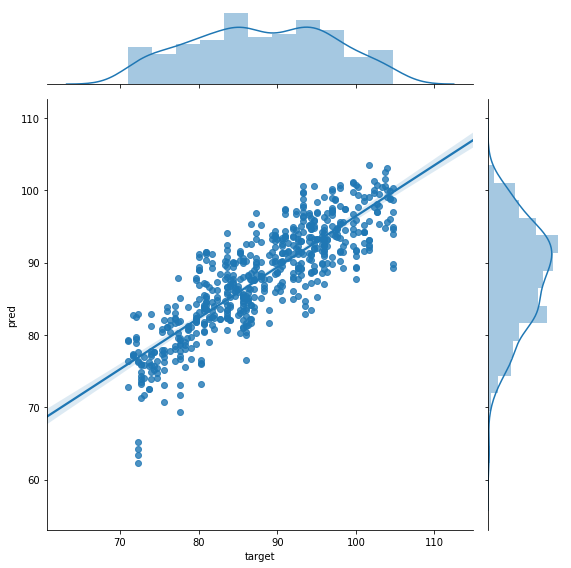

In [84]:
# No BOXCOX
sns.jointplot(x='target', y='pred', data=df, kind='reg', size=8, stat_func=None)
plt.show()

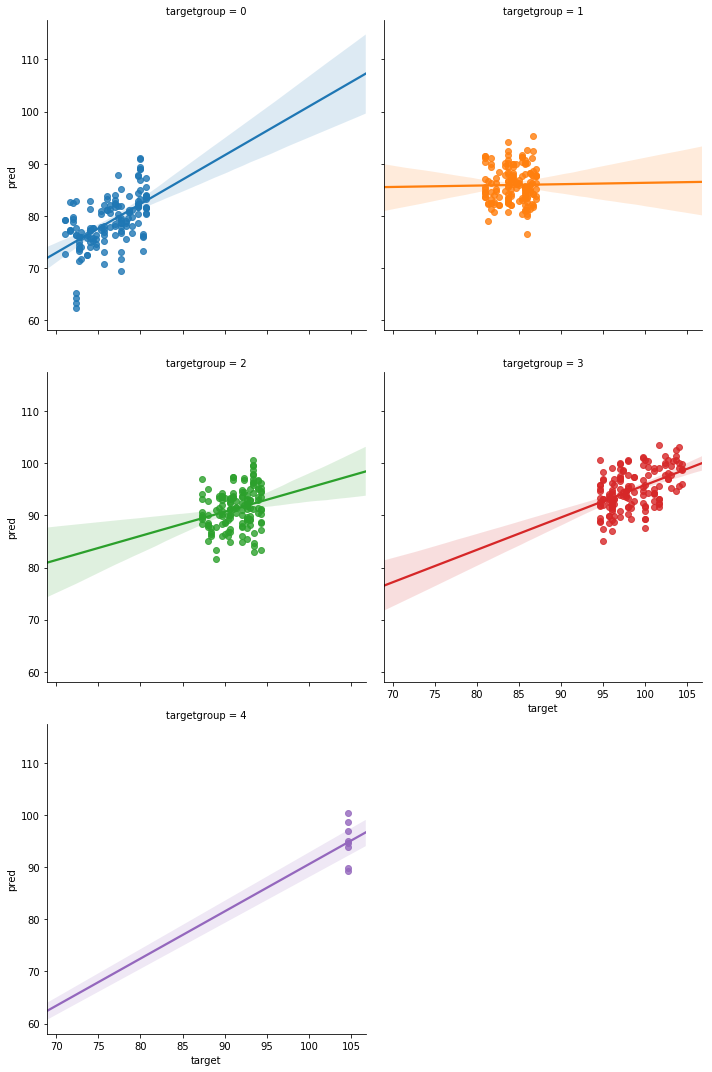

In [85]:
sns.lmplot(x='target',
           y='pred',
           col='targetgroup',
           hue='targetgroup',
           data=df,
           aspect=1,
           col_wrap=2,
           size=5,
           legend=True)
plt.show()

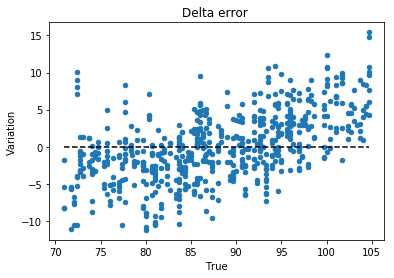

,delta
count,591.000000
mean,0.035731
std,4.634951
min,-11.184539
25%,-2.928318
50%,-0.260943
75%,3.091118
max,15.410748


In [86]:

df.plot.scatter('target', 'delta')
plt.plot([df['target'].min(), df['target'].max()], [0, 0], color='k', linestyle='--')
plt.title('Delta error ')
plt.xlabel('True')
plt.ylabel('Variation')
plt.show()
df[['delta']].describe()